In [1]:
import librosa as lb
import matplotlib.pyplot as plt
import librosa.display
import soundfile as sf
from IPython.display import Audio
import scipy.signal as signal
import numpy as np
from scipy.io.wavfile import write

In [2]:
audio='AI-in-Speech-processing.wav'
signal,samprate=lb.load(audio,sr=None)
print("Sample Rate:",samprate)

Sample Rate: 44100


Trimming Original Signal

In [3]:
# A1. Use librosa.effects.trim() to remove the silence parts of speech from beginning and end of your recorded signal. Listen to the new signal and
# perceptually compare the audio with original.
trim_signal, _ = lb.effects.trim(signal,top_db=25)

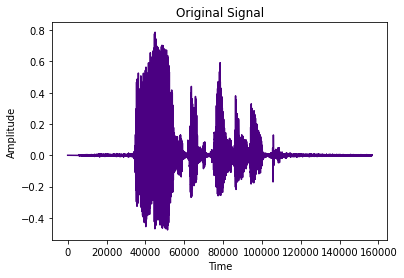

In [4]:
plt.plot(signal,color='indigo')
plt.title('Original Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

In [5]:
print("Original Signal:")
Audio(data=signal, rate=samprate)

Original Signal:


In [6]:
duration = lb.get_duration(y=signal,sr=samprate)
print("The duration of original signal is:",duration)

The duration of original signal is: 3.5526530612244898


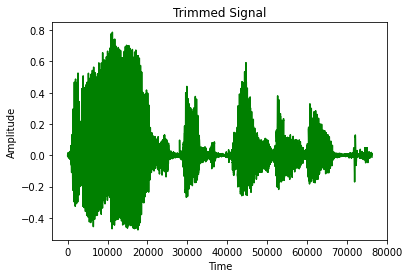

In [7]:
plt.plot(trim_signal,color='green')
plt.title('Trimmed Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

In [8]:
print("Trimmed Signal is:")
Audio(data=trim_signal, rate=samprate)

Trimmed Signal is:


In [9]:
duration = lb.get_duration(y=trim_signal,sr=samprate)
print("The duration of trimmed signal is:",duration)

The duration of trimmed signal is: 1.7298866213151927


In [10]:
write("trimmed_signal.wav",samprate,trim_signal)

Splitting Original Signal

In [11]:
audio='AI-in-Speech-processing.wav'
signal,samprate=lb.load(audio,sr=None)
print("Sample Rate:",samprate)

Sample Rate: 44100


In [12]:
splits=lb.effects.split(signal,top_db=20)

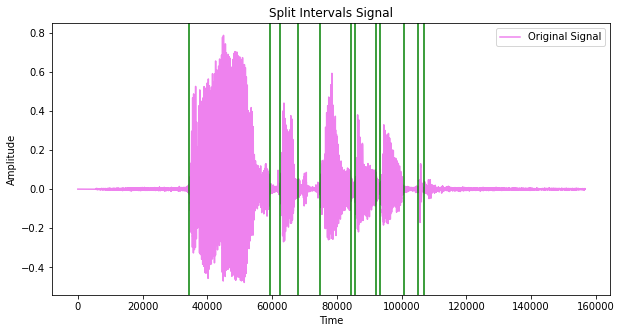

In [13]:
plt.figure(figsize=(10,5))
plt.plot(signal, label='Original Signal',color='violet')
for split in splits:
    plt.axvline(x=split[0],color='green',linestyle='solid')
    plt.axvline(x=split[1],color='green',linestyle='solid')
plt.title('Split Intervals Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

In [14]:
for i, (start,end) in enumerate(splits,1):
    splits=signal[start:end]
    print(f"Split Signal {i}:")
    display(Audio(data=splits,rate=samprate))

Split Signal 1:


Split Signal 2:


Split Signal 3:


Split Signal 4:


Split Signal 5:


Split Signal 6:


Varying top_db

In [15]:
audio='AI-in-Speech-processing.wav'
signal,samprate=lb.load(audio,sr=None)
splits = lb.effects.split(signal,top_db=33)

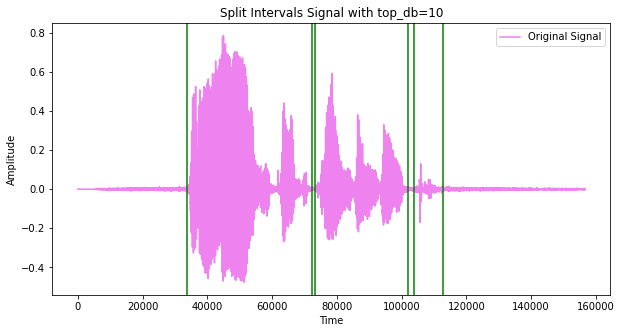

In [16]:
plt.figure(figsize=(10,5))
plt.plot(signal, label='Original Signal',color='violet')
for split in splits:
    plt.axvline(x=split[0],color='green',linestyle='solid')
    plt.axvline(x=split[1],color='green',linestyle='solid')
plt.title('Split Intervals Signal with top_db=10')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

In [17]:
for i, (start,end) in enumerate(splits,1):
    splits=signal[start:end]
    print(f"Split Signal {i}:")
    display(Audio(data=splits,rate=samprate))

Split Signal 1:


Split Signal 2:


Split Signal 3:


Comparisons

In [18]:
audio='AI-in-Speech-processing.wav'
signal, samprate = lb.load(audio,sr=None)

In [20]:
trim_signal, _=lb.effects.trim(signal,top_db=25)

splits=lb.effects.split(signal,top_db=20)

# Compute energy for the original signal
energy_original=np.sum(np.square(signal))

# Compute energy for the trimmed signal
energy_trimmed=np.sum(np.square(trim_signal))

# Compute energy for each split signal
energy_splits = []
for i, (start,end) in enumerate(splits, 1):
    split_signal=signal[start:end]
    energy_split=np.sum(np.square(split_signal))
    energy_splits.append(energy_split)
    print(f"Energy of Split Signal {i}: {energy_split}")

print("\nEnergy of Original Signal:", energy_original)
print("Energy of Trimmed Signal:", energy_trimmed)

Energy of Split Signal 1: 1089.7113037109375
Energy of Split Signal 2: 86.33335876464844
Energy of Split Signal 3: 134.70303344726562
Energy of Split Signal 4: 37.70061111450195
Energy of Split Signal 5: 58.24435043334961
Energy of Split Signal 6: 4.409970760345459

Energy of Original Signal: 1415.3297
Energy of Trimmed Signal: 1414.6566


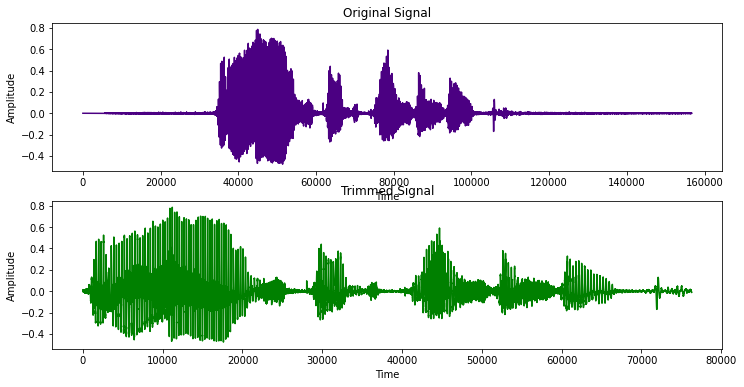

In [21]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(signal, color='indigo')
plt.title('Original Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.subplot(2, 1, 2)
plt.plot(trim_signal, color='green')
plt.title('Trimmed Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

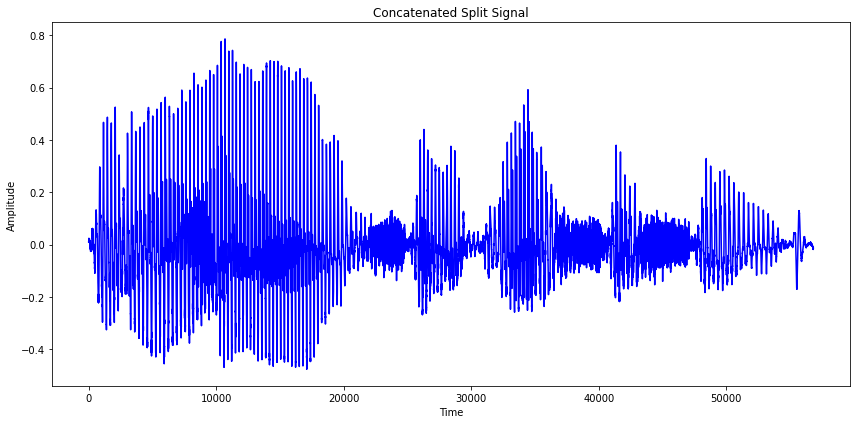

In [22]:
concatenated_split_signal=np.concatenate([signal[start:end] for start,end in splits])
plt.figure(figsize=(12,6))
plt.plot(concatenated_split_signal,color='blue')
plt.title('Concatenated Split Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()